In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas_datareader
import datetime

import pandas_datareader.data as web

In [23]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime.today()

In [24]:
Apple = web.DataReader('AAPL', 'yahoo', start, end)
Cisco = web.DataReader('CSCO', 'yahoo', start, end)
Ibm = web.DataReader('IBM', 'yahoo', start, end)
Amz = web.DataReader('AMZN', 'yahoo', start, end)

In [25]:
Apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674


In [26]:
Apple = Apple.drop(["High","Low","Open","Close"],axis=1)

In [27]:
Cisco = Cisco.drop(["High","Low","Open","Close"],axis=1)

In [28]:
Ibm = Ibm.drop(["High","Low","Open","Close"],axis=1)

In [29]:
Amz = Amz.drop(["High","Low","Open","Close"],axis=1)

In [30]:
Apple.head(3)

,Volume,Adj Close
Date,,
2012-01-03,302220800.0,12.650659
2012-01-04,260022000.0,12.718646
2012-01-05,271269600.0,12.859850


In [31]:
Apple.iloc[0]["Adj Close"]

12.65065860748291

In [32]:
for stock_df in (Apple,Cisco,Ibm,Amz):
    stock_df["Normed Return"] = stock_df["Adj Close"]/stock_df.iloc[0]["Adj Close"]

In [33]:
Apple.head()

,Volume,Adj Close,Normed Return
Date,,,
2012-01-03,302220800.0,12.650659,1.000000
2012-01-04,260022000.0,12.718646,1.005374
2012-01-05,271269600.0,12.859850,1.016536
2012-01-06,318292800.0,12.994284,1.027163
2012-01-09,394024400.0,12.973674,1.025533


In [34]:
Apple.tail(3)

,Volume,Adj Close,Normed Return
Date,,,
2021-02-19,87525900.0,129.869995,10.265868
2021-02-22,103607600.0,126.000000,9.959956
2021-02-23,157859100.0,125.860001,9.948889


In [35]:
# Creating Portfolio with above stocks
# 30% in apple
# 20% in cisco
# 40% in amazon
# 10% in ibm

In [36]:
for stock_df,allocations in zip((Apple,Cisco,Ibm,Amz),[0.3,0.2,0.4,0.1]):
    stock_df["Allocation"] = stock_df["Normed Return"]*allocations

In [37]:
Apple.head(4)

,Volume,Adj Close,Normed Return,Allocation
Date,,,,
2012-01-03,302220800.0,12.650659,1.000000,0.300000
2012-01-04,260022000.0,12.718646,1.005374,0.301612
2012-01-05,271269600.0,12.859850,1.016536,0.304961
2012-01-06,318292800.0,12.994284,1.027163,0.308149


In [46]:
for stock_df in (Apple,Cisco,Ibm,Amz):
    stock_df["Position Values"] =   stock_df["Allocation"] * 1000

In [47]:
Apple.head(3)

,Volume,Adj Close,Normed Return,Allocation,Position Values
Date,,,,,
2012-01-03,302220800.0,12.650659,1.000000,0.300000,300.000000
2012-01-04,260022000.0,12.718646,1.005374,0.301612,301.612266
2012-01-05,271269600.0,12.859850,1.016536,0.304961,304.960801


In [48]:
Apple.tail(2)

,Volume,Adj Close,Normed Return,Allocation,Position Values
Date,,,,,
2021-02-22,103607600.0,126.000000,9.959956,2.987987,2987.986726
2021-02-23,157859100.0,125.860001,9.948889,2.984667,2984.666756


In [49]:
all_pos_vals = [Apple["Position Values"],Cisco["Position Values"],Ibm["Position Values"],Amz["Position Values"]]
portfolio_values = pd.concat(all_pos_vals,axis=1)

In [50]:
portfolio_values.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000
2012-01-04,301.612266,203.864710,398.368067,99.150978
2012-01-05,304.960801,203.113283,396.478746,99.206838
2012-01-06,308.148787,202.361815,391.926944,101.999666
2012-01-09,307.660041,203.650061,389.887208,99.737473


In [51]:
portfolio_values.columns = ["Apple Position","Cisco Position","IBM Position","Amazon Position"]

In [52]:
portfolio_values.head()

,Apple Position,Cisco Position,IBM Position,Amazon Position
Date,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000
2012-01-04,301.612266,203.864710,398.368067,99.150978
2012-01-05,304.960801,203.113283,396.478746,99.206838
2012-01-06,308.148787,202.361815,391.926944,101.999666
2012-01-09,307.660041,203.650061,389.887208,99.737473


In [53]:
portfolio_values["Total Position Value"] = portfolio_values.sum(axis=1)

In [54]:
portfolio_values

,Apple Position,Cisco Position,IBM Position,Amazon Position,Total Position Value
Date,,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000,1000.000000
2012-01-04,301.612266,203.864710,398.368067,99.150978,1002.996021
2012-01-05,304.960801,203.113283,396.478746,99.206838,1003.759667
2012-01-06,308.148787,202.361815,391.926944,101.999666,1004.437212
2012-01-09,307.660041,203.650061,389.887208,99.737473,1000.934783
...,...,...,...,...,...
2021-02-17,3102.763273,654.331594,355.779649,1848.092451,5960.966966
2021-02-18,3075.966495,655.604890,358.033490,1859.034800,5948.639675
2021-02-19,3079.760489,646.267404,352.873378,1815.282313,5894.183584


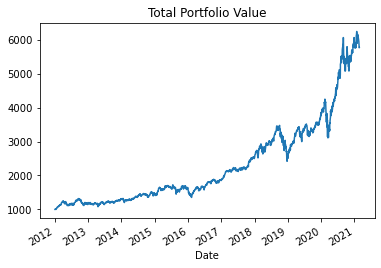

In [56]:
portfolio_values["Total Position Value"].plot();
plt.title("Total Portfolio Value");

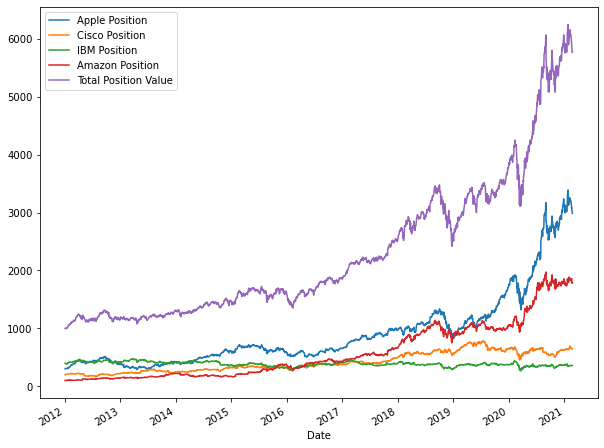

In [58]:
portfolio_values.plot(figsize=(10,8));

## Portfolio Stats

In [59]:
portfolio_values["Daily Return"] = portfolio_values["Total Position Value"].pct_change(1)

In [60]:
portfolio_values.head()

,Apple Position,Cisco Position,IBM Position,Amazon Position,Total Position Value,Daily Return
Date,,,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000,1000.000000,NaN
2012-01-04,301.612266,203.864710,398.368067,99.150978,1002.996021,0.002996
2012-01-05,304.960801,203.113283,396.478746,99.206838,1003.759667,0.000761
2012-01-06,308.148787,202.361815,391.926944,101.999666,1004.437212,0.000675
2012-01-09,307.660041,203.650061,389.887208,99.737473,1000.934783,-0.003487


In [61]:
portfolio_values["Daily Return"].mean()

0.0008525303983997581

In [62]:
portfolio_values["Daily Return"].std()

0.01339518306705073

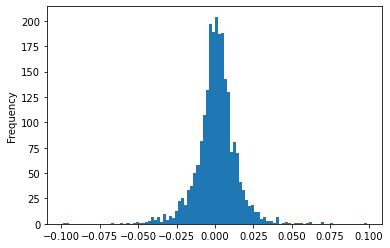

In [64]:
portfolio_values["Daily Return"].plot(kind="hist",bins=100);

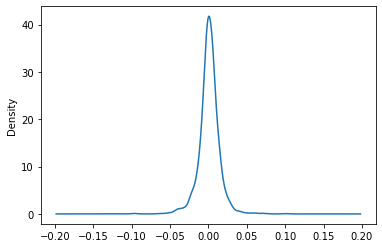

In [65]:
portfolio_values["Daily Return"].plot(kind="kde");

In [66]:
Overall_return = (portfolio_values["Total Position Value"][-1]/portfolio_values["Total Position Value"][0] - 1)*100

In [67]:
Overall_return

477.0841018676128

#### Sharp Ratio

In [68]:
SR = portfolio_values["Daily Return"].mean()/portfolio_values["Daily Return"].std()

In [69]:
SR

0.06364454999475144

In [70]:
ASR = (252**0.5)* SR

In [71]:
ASR

1.010325909544377

In [72]:
#   ASR >1 good ; >2 Very good; >3 excellent